In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
stock_prices_df=pd.read_csv("stock_prices.csv")
stock_prices_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151501,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111172,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228086,283192000
...,...,...,...,...,...,...,...
917,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.505665,104174400
918,2019-08-27,51.965000,52.137501,50.882500,51.040001,49.935772,103493200
919,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.270855,63755200
920,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.122036,83962000


In [3]:
twitter_sentiment_df=pd.read_csv("twitter_sentiment.csv")
twitter_sentiment_df

,Date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430
...,...,...,...
1336,2019-08-29,0.056460,1083
1337,2019-08-30,0.106096,1005
1338,2019-08-31,0.151625,224
1339,2019-09-01,0.059887,200


In [4]:
twitter_sentiment_df=twitter_sentiment_df.dropna(axis=1)
twitter_sentiment_df

,Date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430
...,...,...,...
1336,2019-08-29,0.056460,1083
1337,2019-08-30,0.106096,1005
1338,2019-08-31,0.151625,224
1339,2019-09-01,0.059887,200


In [5]:
stock_prices_df=stock_prices_df.dropna(axis=1)
stock_prices_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151501,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111172,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228086,283192000
...,...,...,...,...,...,...,...
917,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.505665,104174400
918,2019-08-27,51.965000,52.137501,50.882500,51.040001,49.935772,103493200
919,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.270855,63755200
920,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.122036,83962000


In [6]:
merged_df=stock_prices_df.merge(twitter_sentiment_df,on="Date")
merged_df.dropna(axis=1) 

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151501,270597600,0.070389,1133
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,0.133635,1430
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,0.072042,1949
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111172,324377600,0.074369,2289
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228086,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...,...
917,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.505665,104174400,0.072340,888
918,2019-08-27,51.965000,52.137501,50.882500,51.040001,49.935772,103493200,0.117541,962
919,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.270855,63755200,0.061477,895
920,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.122036,83962000,0.056460,1083


In [7]:
merged_df.to_csv("merged_stocks_and_twitter_sentiment.csv",index=False)

In [8]:
merged_df=pd.read_csv("merged_stocks_and_twitter_sentiment.csv")
df=merged_df[["Date","Adj Close","Volume","ts_polarity","twitter_volume"]]
df.set_index("Date",inplace=True)

In [9]:
pos_sentiment_thres=0.10294888600847897
neg_sentiment_thres=-0.0013141180857257349

sentiments=[]
for score in df["ts_polarity"]:
  if score>=pos_sentiment_thres:
    sentiments.append("Positive")
  elif score<=neg_sentiment_thres:
    sentiments.append("Negative")
  else:
    sentiments.append("Neutral")
df["Sentiment"]=sentiments
df

<ipython-input-9-9bd7834a9810>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"]=sentiments


,Adj Close,Volume,ts_polarity,twitter_volume,Sentiment
Date,,,,,
2016-01-04,24.151501,270597600,0.070389,1133,Neutral
2016-01-05,23.546272,223164000,0.133635,1430,Positive
2016-01-06,23.085484,273829600,0.072042,1949,Neutral
2016-01-07,22.111172,324377600,0.074369,2289,Neutral
2016-01-08,22.228086,283192000,0.051595,2235,Neutral
...,...,...,...,...,...
2019-08-26,50.505665,104174400,0.072340,888,Neutral
2019-08-27,49.935772,103493200,0.117541,962,Positive
2019-08-28,50.270855,63755200,0.061477,895,Neutral


In [10]:
df["Sentiment"].value_counts()

Positive    453
Neutral     447
Negative     22
Name: Sentiment, dtype: int64

In [11]:
df["Price Difference"]=df["Adj Close"].diff()
df.dropna(inplace=True)
import numpy as np
RISE=1
FALL=0
df["Stock_trend"]=np.where(
    df["Price Difference"]>0,RISE,FALL
)
df


<ipython-input-11-3f8c78506127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price Difference"]=df["Adj Close"].diff()
<ipython-input-11-3f8c78506127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-11-3f8c78506127>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Stock_tr

,Adj Close,Volume,ts_polarity,twitter_volume,Sentiment,Price Difference,Stock_trend
Date,,,,,,,
2016-01-05,23.546272,223164000,0.133635,1430,Positive,-0.605229,0
2016-01-06,23.085484,273829600,0.072042,1949,Neutral,-0.460788,0
2016-01-07,22.111172,324377600,0.074369,2289,Neutral,-0.974312,0
2016-01-08,22.228086,283192000,0.051595,2235,Neutral,0.116914,1
2016-01-11,22.588011,198957600,0.019443,1222,Neutral,0.359925,1
...,...,...,...,...,...,...,...
2019-08-26,50.505665,104174400,0.072340,888,Neutral,0.941677,1
2019-08-27,49.935772,103493200,0.117541,962,Positive,-0.569893,0
2019-08-28,50.270855,63755200,0.061477,895,Neutral,0.335083,1


In [12]:
#binary encoding 
new_df=df[["Adj Close",
           "Volume",
           "twitter_volume",
           "Sentiment",
           "Stock_trend"]]
new_df=pd.get_dummies(new_df,columns=["Sentiment"])
new_df.dropna(axis=1)

,Adj Close,Volume,twitter_volume,Stock_trend,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,,,,
2016-01-05,23.546272,223164000,1430,0,0,0,1
2016-01-06,23.085484,273829600,1949,0,0,1,0
2016-01-07,22.111172,324377600,2289,0,0,1,0
2016-01-08,22.228086,283192000,2235,1,0,1,0
2016-01-11,22.588011,198957600,1222,1,0,1,0
...,...,...,...,...,...,...,...
2019-08-26,50.505665,104174400,888,1,0,1,0
2019-08-27,49.935772,103493200,962,0,0,0,1
2019-08-28,50.270855,63755200,895,1,0,1,0


In [13]:
X=new_df.copy()
X.drop("Stock_trend",axis=1,inplace=True)
X

,Adj Close,Volume,twitter_volume,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,,,
2016-01-05,23.546272,223164000,1430,0,0,1
2016-01-06,23.085484,273829600,1949,0,1,0
2016-01-07,22.111172,324377600,2289,0,1,0
2016-01-08,22.228086,283192000,2235,0,1,0
2016-01-11,22.588011,198957600,1222,0,1,0
...,...,...,...,...,...,...
2019-08-26,50.505665,104174400,888,0,1,0
2019-08-27,49.935772,103493200,962,0,0,1
2019-08-28,50.270855,63755200,895,0,1,0


In [14]:
y=new_df["Stock_trend"].values.reshape(-1,1)

In [15]:
split=int(0.8*len(X))
X_train=X[:split] 
X_test=X[split:] 
y_train=y[:split] 
y_test=y[split:]

In [16]:
scale=StandardScaler()
X_scaler=scale.fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

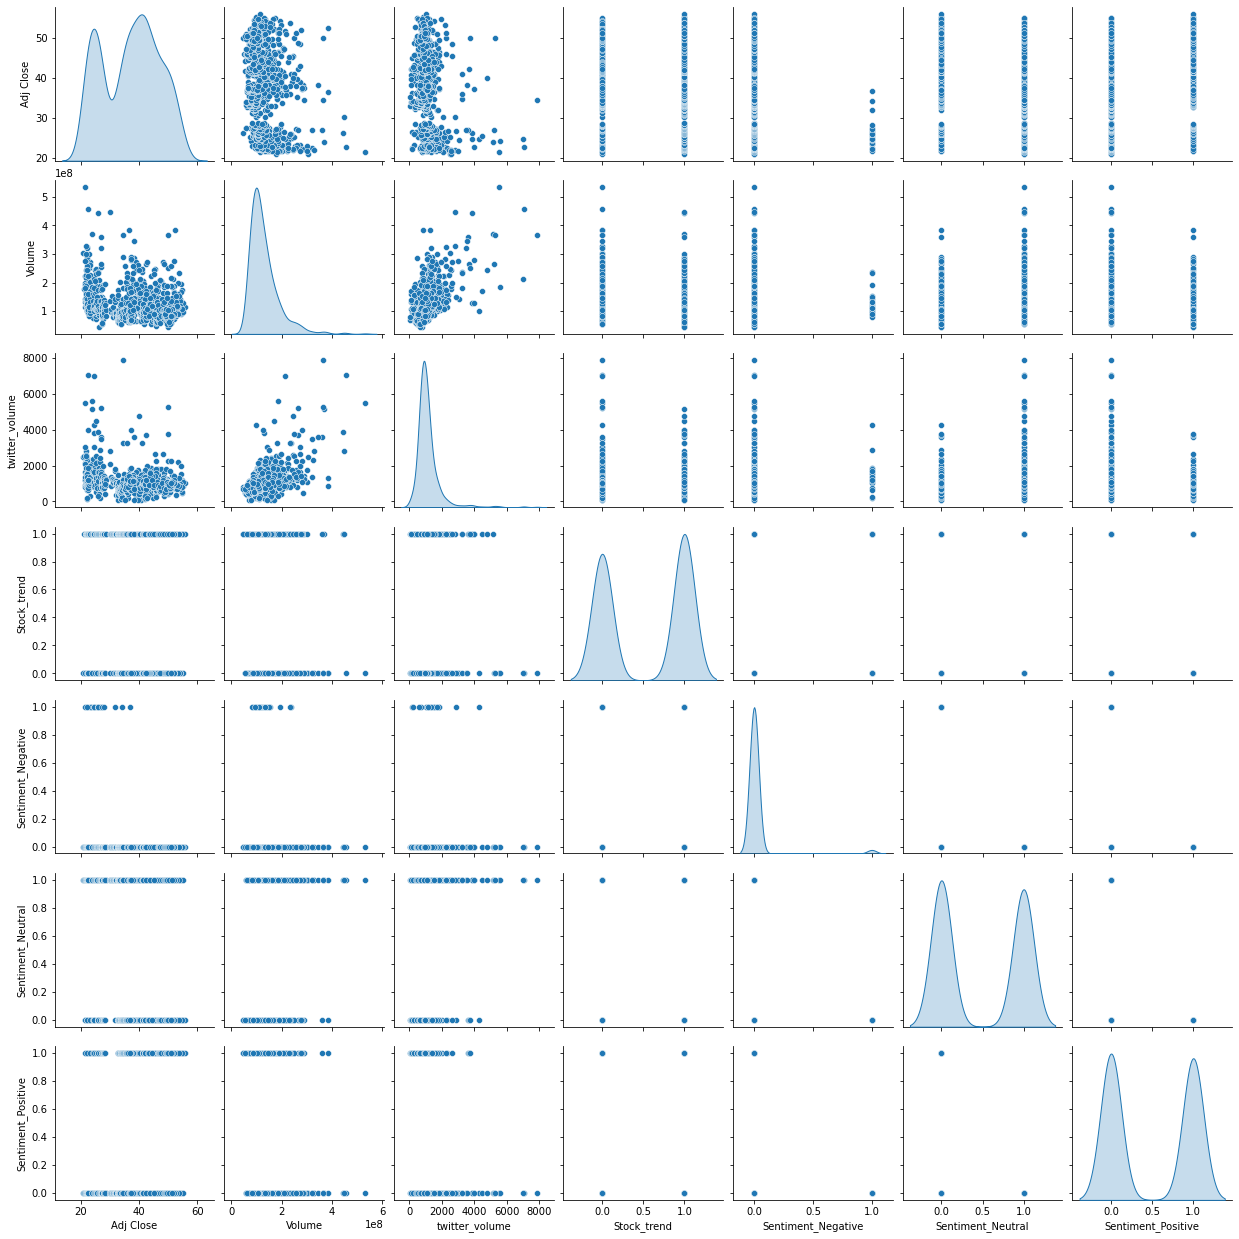

In [17]:
import seaborn as sns
sns.pairplot(data=new_df, diag_kind='kde')


In [18]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_scaled, y_train)

<ipython-input-18-f84f62177f08>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=20)

In [19]:
confusion_matrix(y_test, model.predict(X_test_scaled))
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test_scaled))*100,2)}")

Accuracy is 56.76


In [20]:
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500,600],
              'max_features':randint(1,10),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,25),
              }

In [29]:
classifier = RandomForestClassifier(n_jobs = -1)
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 100,cv= 9)
search_clfr.fit(X_train_scaled, y_train)

C:\Users\saksh\anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.49864499 0.48511158 0.50824718        nan 0.51764863 0.52040885
 0.49452976 0.527117   0.51492188        nan 0.50675834 0.5067918
 0.50267657 0.51634381 0.5245408  0.51351668        nan        nan
 0.51490515        nan 0.50943491 0.50950182        nan        nan
        nan 0.50806317 0.51490515        nan        nan 0.50945164
 0.51232895 0.53529727 0.49463013 0.51771555        nan 0.5339088
 0.50672488 0.50264311        nan 0.52303523 0.52439024 0.52710027
 0.49866172        nan 0.51217839        nan 0.49586805 0.50813008
 0.51355014 0.51355014 0.51898692 0.50540333 0.52986048 0.5190371
 0.50265984 0.54620429 0.50948509 0.51897019 0.50677507 0.5067918
 0.51624343 0.49727324 0.5067918  0.49319148 0.51351668        nan
 0.52169695        nan 0.54210579 0.51769882 0.50555388 0.52030847
        nan        nan 0.50130483 0.50543678 0.51231222 0.

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EF57867880>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EF54D31880>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500, 600]})

In [30]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 21, 'n_estimators': 600}
0.5462042892033859


In [31]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=500,bootstrap= True,criterion='entropy',max_depth=12,max_features=3,min_samples_leaf= 30)

In [52]:
classifier.fit(X_train_scaled, y_train)

<ipython-input-52-439d69da09e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', max_depth=12, max_features=3,
                       min_samples_leaf=30, n_estimators=500, n_jobs=-1)

In [33]:
confusion_matrix(y_test, classifier.predict(X_test_scaled))

array([[25, 58],
       [15, 87]], dtype=int64)

In [34]:
print(f"Accuracy is {round(accuracy_score(y_test, classifier.predict(X_test_scaled))*100,2)}%")

Accuracy is 60.54%
